# Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

import warnings
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanwa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tanwa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tanwa\AppData\Roaming\nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tanwa\AppData\Roaming\nltk_data...


# Data Overview

In [2]:
df = pd.read_csv("D:\\downloads\\amazon.csv")

In [3]:
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


This is an Amazon Sales Dataset, it contains information on 1k+ Amazon products, including their ratings, reviews, and other details

# Data Cleaning

1. Columns such as rating, rating_count, discounted_price and actual_price are objects which have to be converted to numeric to effectivly analyse the data.
2. Null value treatment
3. Removed some columns which do not surve any purpose to analyses.
4. The category column is more like a keywords column. So, it will be devided into two columns, which are category and keyword to get better insight out of it.

In [4]:
df = df[['product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'review_title',
       'review_content']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_name         1465 non-null   object
 1   category             1465 non-null   object
 2   discounted_price     1465 non-null   object
 3   actual_price         1465 non-null   object
 4   discount_percentage  1465 non-null   object
 5   rating               1465 non-null   object
 6   rating_count         1463 non-null   object
 7   about_product        1465 non-null   object
 8   review_title         1465 non-null   object
 9   review_content       1465 non-null   object
dtypes: object(10)
memory usage: 114.6+ KB


In [6]:
df.head(3)

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."


In [7]:
# Checking for null values
df.isna().sum()

product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
review_title           0
review_content         0
dtype: int64

In [8]:
df.dropna(inplace= True) # since there are only two null values we can drop those

In [9]:
df.isna().sum()

product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
review_title           0
review_content         0
dtype: int64

In [10]:
# Made necessary changes to the columns which were causing issue 
df['discounted_price'] = df['discounted_price'].str.replace('[₹,]','', regex = True)
df['discount_percentage'] = df['discount_percentage'].str.replace('[%]','', regex = True)
df['actual_price'] = df['actual_price'].str.replace('[₹,]','', regex = True)
df['rating_count'] = df['rating_count'].str.replace('[,]','', regex = True)
df['rating'] = df['rating'].str.replace('[|]','', regex = True)

# Converted the columns to numeric
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors= "coerce")
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors= "coerce")
df['actual_price'] = pd.to_numeric(df['actual_price'], errors= "coerce")
df['rating_count'] = pd.to_numeric(df['rating_count'], errors= "coerce")
df['rating'] = pd.to_numeric(df['rating'], errors= "coerce")

In [11]:
df.isna().sum()

product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           0
about_product          0
review_title           0
review_content         0
dtype: int64

In [12]:
df.dropna(inplace= True)

In [13]:
df.drop_duplicates(keep = "first", inplace= True)

In [14]:
df['keywords'] = df['category']

In [15]:
# This function helps in extracting the core categories of the product
def extract_category(row):
    if 'Home&Kitchen' in row:
        return 'Home&Kitchen'
    elif 'Computers&Accessories' in row:
        return 'Computers&Accessories'
    elif 'Electronics' in row:
        return 'Electronics'
    elif 'OfficeProducts' in row:
        return 'OfficeProducts'
    elif 'HomeImprovement' in row:
        return 'HomeImprovement'
    elif 'Car&Motorbike' in row:
        return 'Car&Motorbike'
    elif 'Health&PersonalCare' in row:
        return 'Health&PersonalCare'
    elif 'Toys&Games' in row:
        return 'Toys&Games'
    else:
        return 'MusicalInstruments'

# Overriting the category column with the help of defined function 
df['category'] = df['category'].apply(extract_category)

# Exploratory Data Analysis

__Average rating for each product category__

In [16]:
df.groupby(['category'])['rating'].mean().to_frame().sort_values(by="rating", ascending = False)

,rating
category,
Toys&Games,4.300000
OfficeProducts,4.288889
HomeImprovement,4.250000
Computers&Accessories,4.154660
Electronics,4.081641
Home&Kitchen,4.040716
Health&PersonalCare,4.000000
MusicalInstruments,3.900000
Car&Motorbike,3.800000


Insights:
1. Toys&Games and OfficeProducts have the highest average ratings at 4.30 and 4.29, respectively. This suggests that customers are generally very satisfied with products in these categories.
2. Car&Motorbike and MusicalInstruments have the lowest average ratings at 3.80 and 3.90, respectively. This suggests that customers are less satisfied with products in these categories. It can be reduced through quality improvements, better product descriptions, enhanced customer service, or addressing specific customer complaints to boost satisfaction.

__Top rating count products by category__

In [17]:
df.loc[df.groupby('category')['rating_count'].idxmax()]

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content,keywords
1157,Reffair AX30 [MAX] Portable Air Purifier for C...,Car&Motorbike,2339.0,4000.0,42,3.8,1118,[NEW LAUNCH - INNOVATIVE DESIGN] EFFICIENT PUR...,"Liked it,User friendly and effective,Not as pe...","As of now its working fine, but don't expect m...",Car&Motorbike|CarAccessories|InteriorAccessori...
588,SanDisk Cruzer Blade 32GB USB Flash Drive,Computers&Accessories,289.0,650.0,56,4.3,253105,"Ultra-compact and portable USB flash drive,Cap...","Good product,Affordable,Good,Reding speed is o...","Very chip very good,Really happy to buy this p...",Computers&Accessories|ExternalDevices&DataStor...
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,Electronics,219.0,700.0,69,4.4,426973,"Flexible, lightweight HDMI cable for connectin...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,"Electronics|HomeTheater,TV&Video|Accessories|C..."
1247,Dr Trust Electronic Kitchen Digital Scale Weig...,Health&PersonalCare,899.0,1900.0,53,4.0,3663,Tare function: It comes with tare function whi...,"Design Optimised for Functionality, Durability...",This is aesthetically the most appealing Digit...,Health&PersonalCare|HomeMedicalSupplies&Equipm...
1028,Pigeon Polypropylene Mini Handy and Compact Ch...,Home&Kitchen,199.0,495.0,60,4.1,270563,Unique string function to chop vegetables and ...,"Nice chopper,Small easy use n clean,Not good,G...","1st product came faulty got it replaced , repl...",Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...
982,"Gizga Essentials Cable Organiser, Cord Managem...",HomeImprovement,249.0,599.0,58,4.5,5985,Gizga Essentials Reusable Cable Ties are re-us...,"Very useful product to organize cable,Great, b...",I have lot of cables running between my Sounds...,HomeImprovement|Electrical|CordManagement
613,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,MusicalInstruments,798.0,1995.0,60,4.0,68664,"BOYA BY-M1 is an omni directional microphone, ...",DETAILED REVIEW with Best settings for better ...,"NOTE :@ Its ready to go Mic, which doesn't nee...",MusicalInstruments|Microphones|Condenser
702,COI Note Pad/Memo Book with Sticky Notes & Cli...,OfficeProducts,198.0,800.0,75,4.1,9344,"It is a diary style desk organizer,memo note p...","Multipurpose and time-saving,Good notepad for ...",Compact product to use during travels or even ...,OfficeProducts|OfficePaperProducts|Paper|Stati...
924,Faber-Castell Connector Pen Set - Pack of 25 (...,Toys&Games,150.0,150.0,0,4.3,15867,Simply draw and color or clip these pens toget...,As this was my 2nd order for same product.2nd ...,Torn packing.dekhne me product used lg rha tha...,Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...


This data will help in identifying, among different categories which products are most popular ones

__Relationship between discount percentage and actual price__

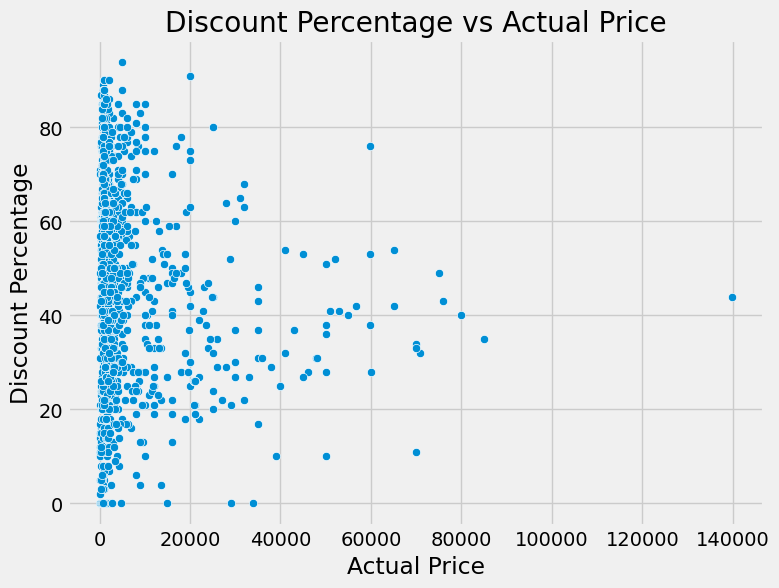

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='actual_price', y='discount_percentage', data=df)
plt.title('Discount Percentage vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Discount Percentage')
plt.show()

In [19]:
df['discount_percentage'].corr(df['actual_price'])

-0.11358380802496314

Statistically we can not say that there is any direct relationship between price of the product and discount percentage. Although they are negatively correlated but the value is considerably low i.e -0.11 (this mean if actual price increases there is only 11% chance that discount percentage will decrease. 

__Price Distribution__

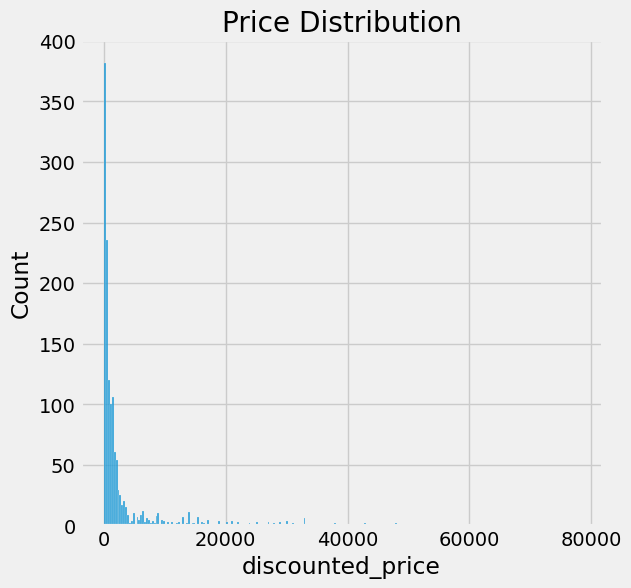

In [20]:
plt.figure(figsize = (6,6))
sns.histplot(df['discounted_price'])
plt.title("Price Distribution")
plt.show()

Majority of the products are below 10,000 range

__How does the average discount percentage vary across categories__

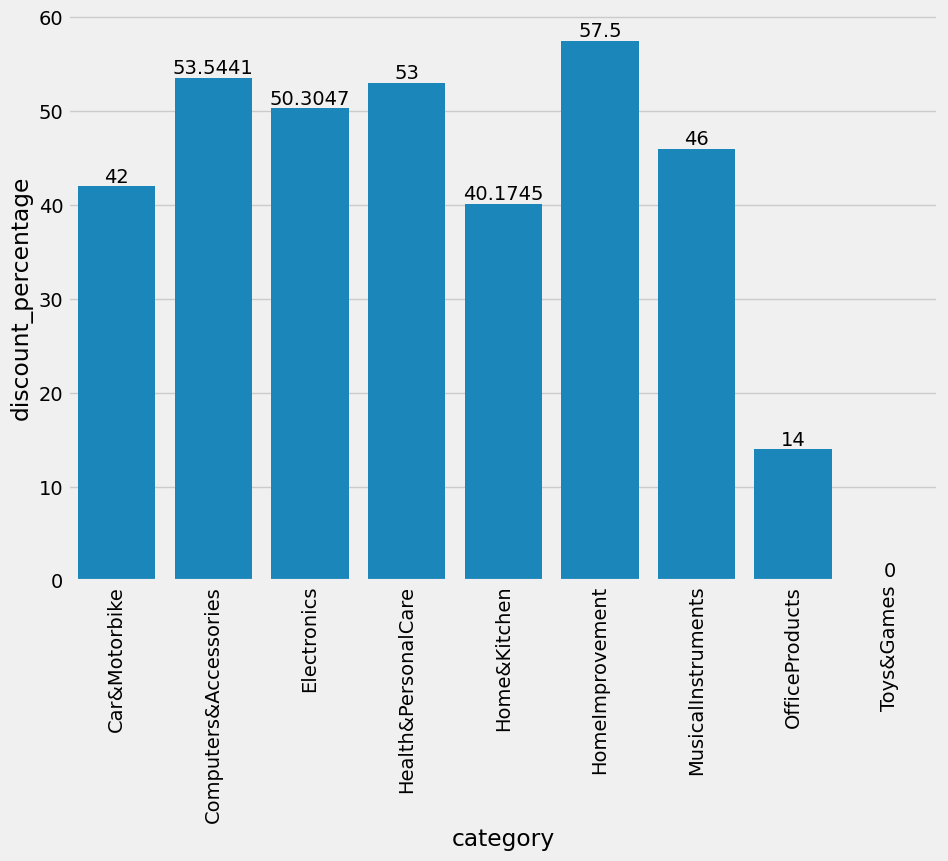

In [21]:
avg_discount_identifier = df.groupby("category")['discount_percentage'].mean().to_frame().reset_index()

plt.figure(figsize = (10,7))
ax = sns.barplot(x = avg_discount_identifier['category'], y = avg_discount_identifier['discount_percentage'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation = 90, ha = "center")
plt.show()

Insights:
1. HomeImprovement: This category has the highest average discount at 57.5%. This suggests that products in this category might often be heavily discounted, possibly to attract more customers or to clear out inventory.
3. Toys&Games: With a 0% discount, this category shows no discounts being offered. This could imply either a very high demand where discounts are not needed, or a pricing strategy that does not rely on discounts to drive sales.

__Top 10 popular product names__

In [22]:
df.nlargest(10, 'rating_count')[['product_name','rating_count']]

,product_name,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,426972
352,boAt Bassheads 100 in Ear Wired Earphones with...,363713
400,boAt Bassheads 100 in Ear Wired Earphones with...,363713
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836
473,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",313832


It is clear from the above data that all the top 10 popular products are from Electronics and Computer&Accessoris category. The organisation should make sure that they always have enough stock available, so that they can meet the higher demand of these products. 

__Top 5 popular keywords__

In [23]:
df['keywords'].value_counts().nlargest(5).to_frame()

,count
keywords,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,183
Electronics|WearableTechnology|SmartWatches,74
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,64
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",61
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52


__Top 5 popular product reviews__

In [24]:
df['review_title'].value_counts().nlargest(5).to_frame()

,count
review_title,
"Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.",9
"Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good",8
"Fake Product,Costly but excellent quality,Storage good but don't know how to Activate warantee??,Good for use,5 stas nahi diya kyuki capacity 477gb hi rahta hai,Speed not as advertise,Good one,It's ok",6
"Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very nice it's charging like jet",6
"Above average phone,Worth For The Money 💰,Okie,Phone is excellent,Purchased in good budget at 12k,It can fulfill basic needs in affordable price range,Nice,About features",6


__Correlation between discounted_price and rating__

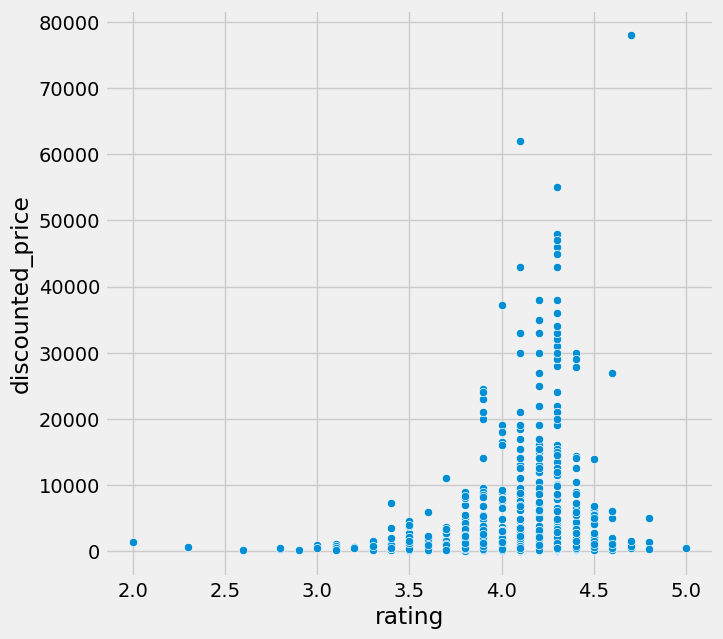

Correlation between discounted price and rating is: 0.12550860467042355


In [25]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = "rating", y = "discounted_price", data = df)
plt.show()

print(f'Correlation between discounted price and rating is: {df['discounted_price'].corr(df['rating'])}')

Discounted price and rating have a considerably week correlation, here we can say that if there will be any change in discounte_price there is approx 12% chance that there will be a positive change in rating too.

__Top 5 categories based on highest ratings__

In [26]:
df.loc[df.groupby("category")['rating'].idxmax(),['category','rating']].head(5).sort_values(by = 'rating', ascending = False)

,category,rating
174,Computers&Accessories,5.0
1145,Home&Kitchen,4.8
249,Electronics,4.7
1247,Health&PersonalCare,4.0
1157,Car&Motorbike,3.8


__Word Cloud of reviews__

In [27]:
from wordcloud import WordCloud

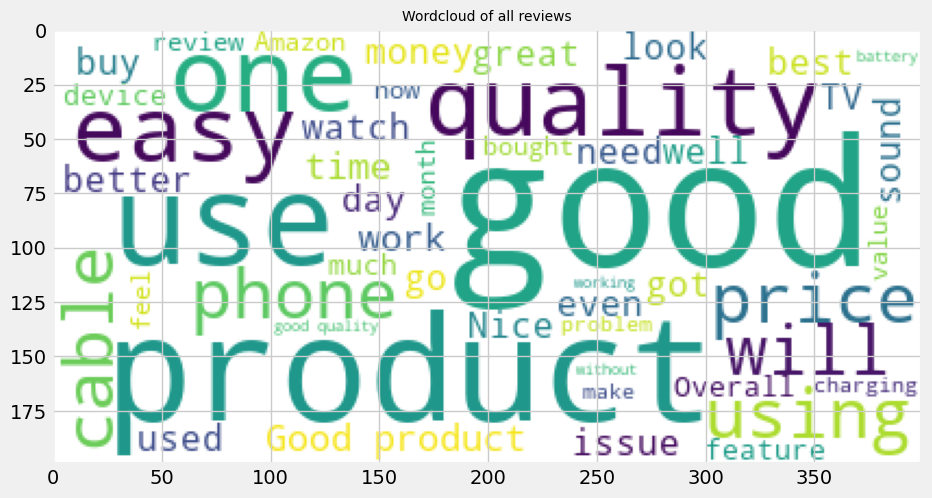

In [28]:
reviews = " ".join([review for review in df['review_content']])
wc = WordCloud(background_color= "White", max_words=50)

plt.figure(figsize = (10,10))
plt.imshow(wc.generate(reviews))
plt.title("Wordcloud of all reviews", fontsize = 10)
plt.show()

__Sentiment Identification__

In [39]:
from nltk.corpus import stopwords

In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tanwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
# sentiment analysis
import string

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    cleared_text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(cleared_text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

df['cleaned_reviews'] = df['review_content'].apply(preprocess_text)
df.head(3)

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content,keywords,cleaned_reviews
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories|Accessories&Peripherals|...,look durable charging fine toono complainschar...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories|Accessories&Peripherals|...,ordered cable connect phone android auto car c...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199.0,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories|Accessories&Peripherals|...,quite durable sturdyhttpsmmediaamazoncomimages...


In [47]:
sia = SentimentIntensityAnalyzer()

def sentiment_analizer(text):
    score = sia.polarity_scores(text)
    return score['compound']

df['vadar_score'] = df['cleaned_reviews'].apply(sentiment_analizer)
df['vadar_sentiment'] = np.where(df['vadar_score'] > 0, "Positive", np.where(df['vadar_score'] < 0, "Negative", "Neutral"))

df.head(3)

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content,keywords,cleaned_reviews,vadar_score,vadar_sentiment
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories|Accessories&Peripherals|...,look durable charging fine toono complainschar...,0.9240,Positive
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories|Accessories&Peripherals|...,ordered cable connect phone android auto car c...,0.9750,Positive
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199.0,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories|Accessories&Peripherals|...,quite durable sturdyhttpsmmediaamazoncomimages...,0.6808,Positive


In [48]:
df['vadar_sentiment'].value_counts()

vadar_sentiment
Positive    1356
Negative      29
Neutral        5
Name: count, dtype: int64